Sourced data from - https://www.coingecko.com/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("Stablecoin Data.xlsx", sheet_name = "Final")

print(df.head())

        Date        Metric          USDT          USDC           DAI
0 2025-06-10         Price  1.000287e+00  9.997682e-01  9.993281e-01
1 2025-06-10    Market Cap  1.548151e+11  6.102596e+10  3.592542e+09
2 2025-06-10  Total Volume  5.994285e+10  9.199047e+09  7.826996e+07
3 2025-06-11         Price  1.000065e+00  9.997819e-01  9.997187e-01
4 2025-06-11    Market Cap  1.551914e+11  6.098176e+10  3.636132e+09


In [6]:
df_melted = df.melt(id_vars=['Date', 'Metric'], value_vars = ['USDT', 'USDC', 'DAI'],
                    var_name='Coin',value_name = 'Value')
df_ready = df_melted.pivot_table(index = ['Date', 'Coin'], columns = 'Metric', values = 'Value').reset_index()

print(df_ready.head())

Metric       Date  Coin    Market Cap     Price  Total Volume
0      2025-06-10   DAI  3.592542e+09  0.999328  7.826996e+07
1      2025-06-10  USDC  6.102596e+10  0.999768  9.199047e+09
2      2025-06-10  USDT  1.548151e+11  1.000287  5.994285e+10
3      2025-06-11   DAI  3.636132e+09  0.999719  1.166467e+08
4      2025-06-11  USDC  6.098176e+10  0.999782  1.119182e+10


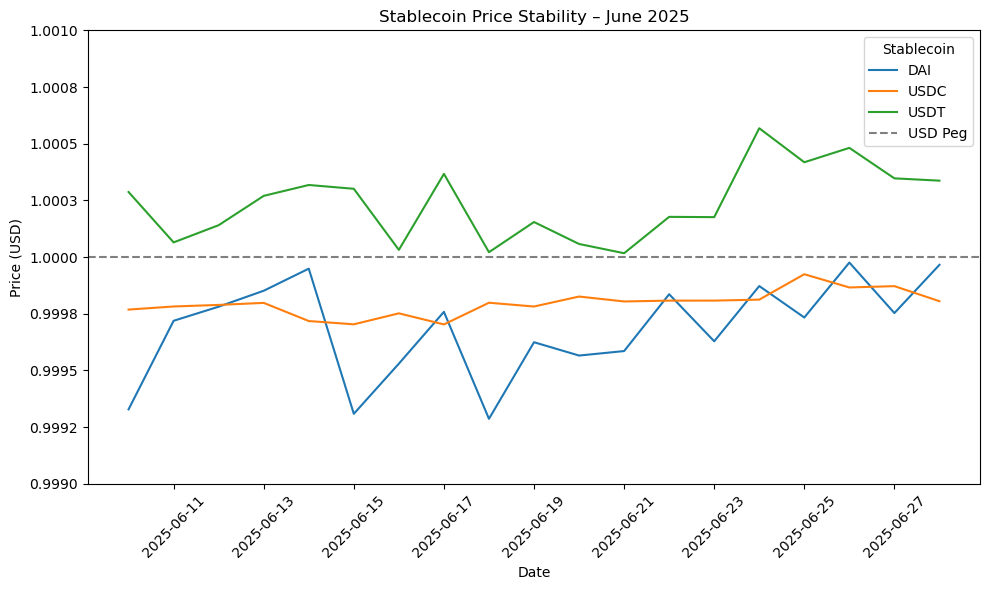

In [61]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_ready, x='Date', y='Price', hue='Coin')
plt.axhline(1, color='gray', linestyle='--', label='USD Peg')

# Set y-axis range manually
plt.ylim(0.999, 1.001)

# Set precise tick formatting
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.4f}'))

plt.title('Stablecoin Price Stability – June 2025')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Stablecoin')
plt.tight_layout()
plt.show()

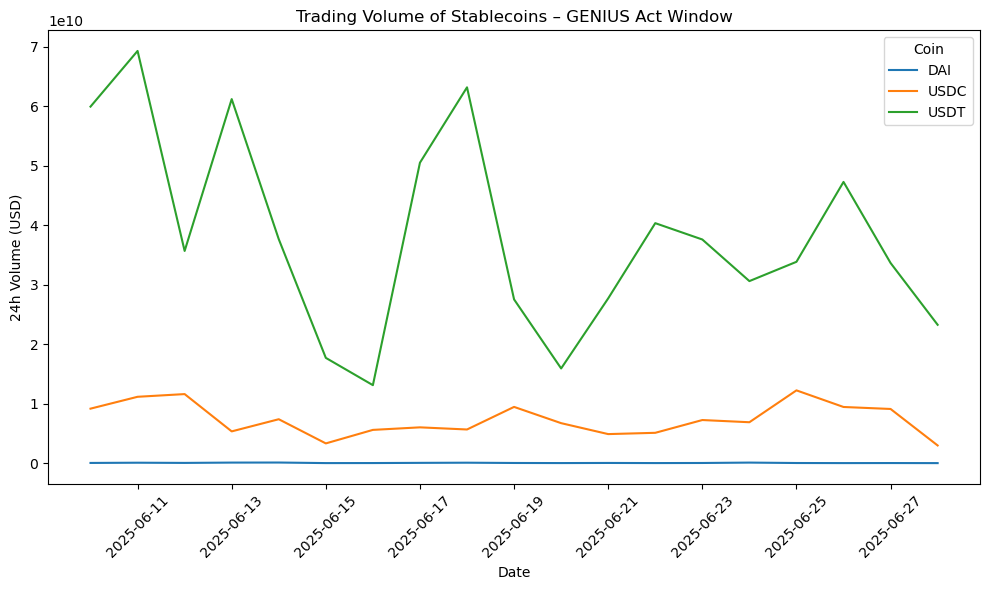

In [91]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_ready, x='Date', y='Total Volume', hue='Coin')
plt.title('Trading Volume of Stablecoins – GENIUS Act Window')
plt.ylabel('24h Volume (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Stablecoin_Trading_Volume.png', dpi=300)
plt.show()

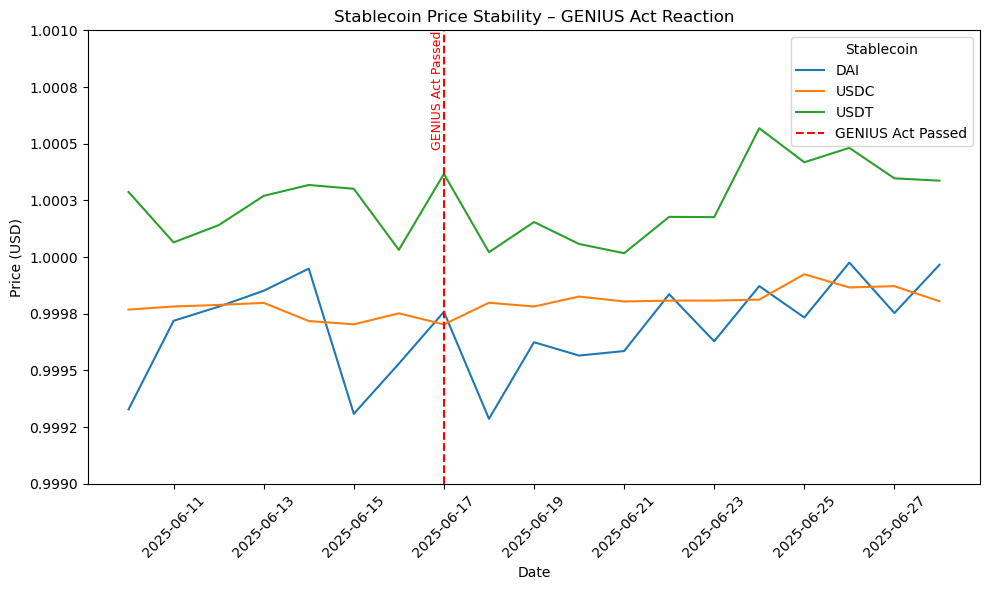

In [89]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

event_date = pd.to_datetime("2025-06-17")

plt.figure(figsize=(10,6))

# Lineplot
sns.lineplot(data=df_ready, x='Date', y='Price', hue='Coin')

# Vertical line annotation
plt.axvline(event_date, color='red', linestyle='--', label='GENIUS Act Passed')

# Optional text label
plt.text(event_date, 1.001, 'GENIUS Act Passed', color='red', rotation=90,
         verticalalignment='top', horizontalalignment='right', fontsize=9)

# Y-axis: precise decimal formatting and limits
plt.ylim(0.999, 1.001)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.4f}'))

# Labels and legend
plt.title('Stablecoin Price Stability – GENIUS Act Reaction')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Stablecoin')
plt.tight_layout()
plt.savefig('Stablecoin_GENIUS_Act_Reaction.png', dpi=300)
plt.show()